![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---

## Reglas

- Fecha de entrega: 01/06/2021
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.

---

## 1. Introducción

Para apoyar a Giturra se trabajará en la creación de un modelo interpretable para identificar clientes riesgosos en función de características de comportamiento crediticio como: historiales de créditos, ingresos y factores financieros relevantes. Dicho lo anterior, el objetivo será predecir a los clientes que presentan un elevado riesgo para la compañia de Giturra.

Dada la relevancia de describir a los clientes riesgosos e identificarlos y el desbalance en los datos se enfocará en maximizar la métrica de Recall sobre los clientes riesgosos (clase 1). El recall nos dirá que porcentaje de las personas riesgosas son realmente riesgosas.

Para este trabajo se cuenta detalladamente con las siguientes variables:

- Age: Representa la edad de la persona
- Annual_Income: Representa el ingreso anual de la persona
- Monthly_Inhand_Salary: Representa el salario mensual base de una persona
- Num_Bank_Accounts: Representa el número de cuentas bancarias que tiene una persona
- Num_Credit_Card: Representa el número de otras tarjetas de crédito que tiene una persona
- Interest_Rate: Representa la tasa de interés de la tarjeta de crédito (porcentaje)
- Num_of_Loan: Representa el número de préstamos tomados del banco
- Delay_from_due_date: Representa el número promedio de días de retraso en la fecha de pago (días)
- Num_of_Delayed_Payment: Representa el número promedio de pagos retrasados por una persona
- Changed_Credit_Limit: Representa el cambio porcentual en el límite de la tarjeta de crédito (porcentaje)
- Num_Credit_Inquiries: Representa el número de consultas de tarjetas de crédito
- Credit_Mix: Representa la clasificación de la mezcla de créditos (Malo, Estándar, Bueno)
- Outstanding_Debt: Representa la deuda pendiente por pagar
- Credit_Utilization_Ratio: Representa la proporción de utilización de la tarjeta de crédito (porcentaje)
- Credit_History_Age: Representa la antigüedad del historial crediticio de la persona (días)
- Payment_of_Min_Amount: Representa si la persona pagó solo el monto mínimo
- Total_EMI_per_month: Representa los pagos mensuales de las cuotas de préstamos
- Amount_invested_monthly: Representa la cantidad invertida mensualmente por el cliente
- Monthly_Balance: Representa el monto del saldo mensual del cliente
- Credit_Score: 1 Si el cliente es riesgoso y 0 sino


## 2. Carga de datos Análisis Exploratorio de Datos

### 2.1. Carga de datos

In [ ]:
# !pip install lightgbm
# !pip install xgboost

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

# Funciones de Pipeline y Transformers (SkLearn)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as ltb
import xgboost as xgb

In [2]:
pd.options.display.max_columns = None

In [129]:
df = pd.read_parquet('dataset.pq')
df.head()

customer_id   age    occupation  annual_income  monthly_inhand_salary  \
0   CUS_0xd40  23.0     Scientist       19114.12            1824.843333   
1  CUS_0x21b1  28.0       Teacher       34847.84            3037.986667   
2  CUS_0x2dbc  34.0      Engineer      143162.64           12187.220000   
3  CUS_0xb891  55.0  Entrepreneur       30689.89            2612.490833   
4  CUS_0x1cdb  21.0     Developer       35547.71            2853.309167   

   num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0                  3                4              3          4.0   
1                  2                4              6          1.0   
2                  1                5              8          3.0   
3                  2                5              4       -100.0   
4                  7                5              5       -100.0   

   delay_from_due_date  num_of_delayed_payment  changed_credit_limit  \
0                    3                     6.0                 11.27   
1                    3                     4.0                  5.42   
2                    8                     6.0                  7.10   
3                    4                     9.0                  1.99   
4                    1                    15.0                  2.58   

   num_credit_inquiries  outstanding_debt  credit_utilization_ratio  \
0                   4.0            809.98                 23.933795   
1                   2.0            605.03                 32.933856   
2                   3.0           1303.01                 38.374753   
3                   4.0            632.46                 27.332515   
4                   4.0            943.86                 25.862922   

   credit_history_age payment_of_min_amount  total_emi_per_month  \
0                 NaN                    No            49.574949   
1                27.0                    No            18.816215   
2                18.0                    No           246.992319   
3                17.0                    No            16.415452   
4                31.0                   Yes             0.000000   

   amount_invested_monthly                 payment_behaviour  monthly_balance  \
0                24.785217  High_spent_Medium_value_payments       358.124168   
1               218.904344    Low_spent_Small_value_payments       356.078109   
2             10000.000000   High_spent_Small_value_payments       895.494583   
3               125.617251   High_spent_Small_value_payments       379.216381   
4               181.330901   High_spent_Small_value_payments       364.000016   

   credit_score  
0             0  
1             0  
2             0  
3             0  
4             0

### 2.2. Análisis exploratorio

In [130]:
print("Número de filas y columnas: ", df.shape)

Número de filas y columnas:  (12500, 22)


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12500 non-null  object 
 1   age                       12500 non-null  float64
 2   occupation                12500 non-null  object 
 3   annual_income             12500 non-null  float64
 4   monthly_inhand_salary     10584 non-null  float64
 5   num_bank_accounts         12500 non-null  int64  
 6   num_credit_card           12500 non-null  int64  
 7   interest_rate             12500 non-null  int64  
 8   num_of_loan               12500 non-null  float64
 9   delay_from_due_date       12500 non-null  int64  
 10  num_of_delayed_payment    11660 non-null  float64
 11  changed_credit_limit      12246 non-null  float64
 12  num_credit_inquiries      12243 non-null  float64
 13  outstanding_debt          12500 non-null  float64
 14  credit

In [132]:
df.describe()

age  annual_income  monthly_inhand_salary  num_bank_accounts  \
count  12500.000000   1.250000e+04           10584.000000       12500.000000   
mean     105.771840   1.616206e+05            4186.634963          16.939920   
std      664.502705   1.297842e+06            3173.690362         114.350815   
min     -500.000000   7.005930e+03             303.645417          -1.000000   
25%       25.000000   1.945333e+04            1622.408646           3.000000   
50%       33.000000   3.757238e+04            3087.595000           6.000000   
75%       42.000000   7.269021e+04            5967.937500           7.000000   
max     8678.000000   2.383470e+07           15204.633333        1756.000000   

       num_credit_card  interest_rate   num_of_loan  delay_from_due_date  \
count     12500.000000   12500.000000  12500.000000         12500.000000   
mean         23.172720      73.213360      3.099440            21.060880   
std         132.005866     468.682227     65.105277            14.863091   
min           0.000000       1.000000   -100.000000            -5.000000   
25%           4.000000       8.000000      1.000000            10.000000   
50%           5.000000      14.000000      3.000000            18.000000   
75%           7.000000      20.000000      5.000000            28.000000   
max        1499.000000    5789.000000   1495.000000            67.000000   

       num_of_delayed_payment  changed_credit_limit  num_credit_inquiries  \
count             11660.00000          12246.000000          12243.000000   
mean                 32.93542             10.398582             26.292330   
std                 237.43768              6.799253            181.821031   
min                  -3.00000             -6.490000              0.000000   
25%                   9.00000              5.370000              4.000000   
50%                  14.00000              9.410000              6.000000   
75%                  18.00000             14.940000             10.000000   
max                4293.00000             36.970000           2554.000000   

       outstanding_debt  credit_utilization_ratio  credit_history_age  \
count      12500.000000              12500.000000        11380.000000   
mean        1426.220376                 32.349265           18.230404   
std         1155.169458                  5.156815            8.302078   
min            0.230000                 20.100770            0.000000   
25%          566.072500                 28.066517           12.000000   
50%         1166.155000                 32.418953           18.000000   
75%         1945.962500                 36.623650           25.000000   
max         4998.070000                 48.199824           33.000000   

       total_emi_per_month  amount_invested_monthly  monthly_balance  \
count         12500.000000             11914.000000     1.214500e+04   
mean           1488.394291               638.798715    -2.744614e+22   
std            8561.449910              2049.195193     3.024684e+24   
min               0.000000                 0.000000    -3.333333e+26   
25%              31.496968                73.736810     2.701501e+02   
50%              72.887628               134.093193     3.393885e+02   
75%             169.634826               261.664256     4.714245e+02   
max           81971.000000             10000.000000     1.463792e+03   

       credit_score  
count  12500.000000  
mean       0.288160  
std        0.452924  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [133]:
print(f'Cantidad de filas duplicadas: {df.duplicated().sum()}')

Cantidad de filas duplicadas: 0


El archivo `profile.html` muestra un análisis univariado de cada atributo del set de datos. Donde se puede observar lo siguiente:

### Outliers

* Se puede notar que la variable `Delay_from_due_date` y `Num_Bank_Accounts` presentan valores negativos, lo cual no debería ocurrir pues representan el número medio de días desde la fecha de pago y el número de cuentas bancarias respectivamente. Por lo que se filtrarán los valores negativos.

* Además, se puede notar la presencia de outliers, el máximo de `age` es 8678, el máximo de `num_credit_card` es 1499 y el máximo de `num_bank_accounts` es 1756, ¿Cómo es posible que alguien tenga tantas cuentas en el banco?. Veamos la distribución con un boxplot



### Distribución de las variables

* `monthly_inhand_salary`, `outstanding_debt`, `amount_invested_monthly` distribuye Log-normal
* `changed_credit_limit`, `credit_utilization_radio` se asemeja a una distribución Normal
* Mientras que el resto de variables no presenta una distribución conocida debido a lo que se puede apreciar en la forma de la distribución empírica dada por los histogramas del reporte.



#### Tratamiento Outliers

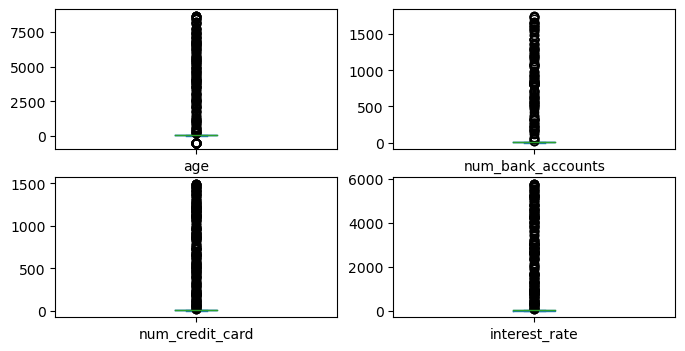

In [134]:
vars = ["age", "num_bank_accounts","num_credit_card","interest_rate"]

_, axs = plt.subplots(2,2,figsize=(8,4))

axs = axs.flatten()
for i, var in enumerate(vars):
    df[var].plot(kind='box', ax=axs[i])

Vemos bastantes outliers por lo que haremos una limpieza.

1. Filtraremos las edades en el rango [18,90] años bajo el supuesto que sólo se ofrecen créditos a mayores de 18 años y a lo más 90 años.
2. Con respecto a las variables `num_bank_accounts`, `num_credit_card` y `interest_rate`, filtraremos valores razonables.

   - `num_bank_accounts` a lo más 10 cuentas. Suponiendo que puede ser porque son varias empresas
   - `num_credit_card` a lo más 10 tarjetas de crédito.
   - `interest_rate` de lo más 30. Es poco razonable una tasa mayor.

In [135]:
df = df[
    (df.delay_from_due_date >= 0) & 
    (df.num_bank_accounts >= 0) &
    (df.age>=18) & 
    (df.age<=90) & 
    (df.num_bank_accounts<=10) & 
    (df.num_credit_card<=10) & 
    (df.interest_rate<=30)
    ].copy()

Si volvemos a ver la distribución a través de un boxplot podemos notar mejor las diferencias

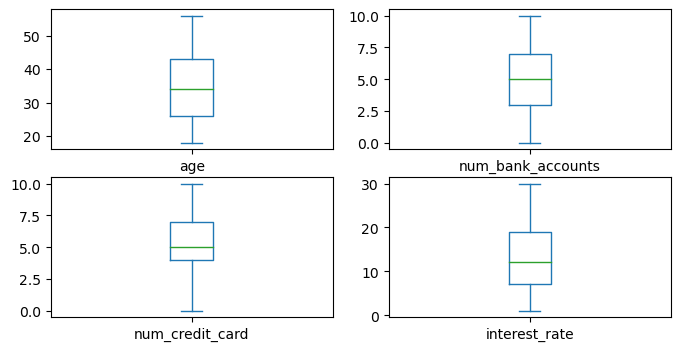

In [136]:
_, axs = plt.subplots(2,2,figsize=(8,4))

axs = axs.flatten()
for i, var in enumerate(vars):
    df[var].plot(kind='box', ax=axs[i])

<AxesSubplot:>

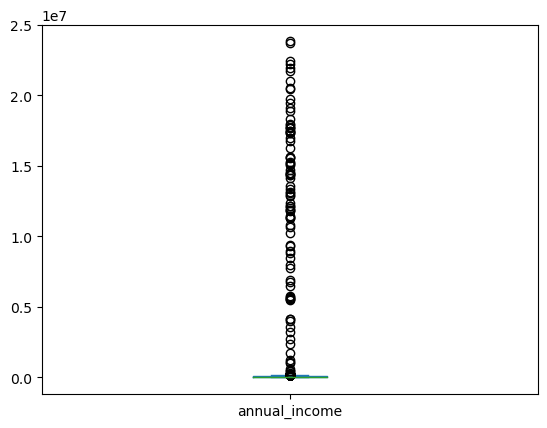

In [137]:
df["annual_income"].plot(kind='box')

Si vemos la variable `annual_income` también presenta mucha dispersión. 

Le aplicaremos logaritmo y filtraremos aquellos valores sobre 4 desviaciones estándar sobre la media.

In [138]:
df["log_annual_income"] = df["annual_income"].apply(np.log)

mean_annual_income = df["log_annual_income"].mean()
std_annual_income = df["log_annual_income"].std()

df = df[(df["log_annual_income"]<mean_annual_income + 4*std_annual_income)].copy()

Si vemos si distribución ahora, se tiene lo siguiente

<AxesSubplot:>

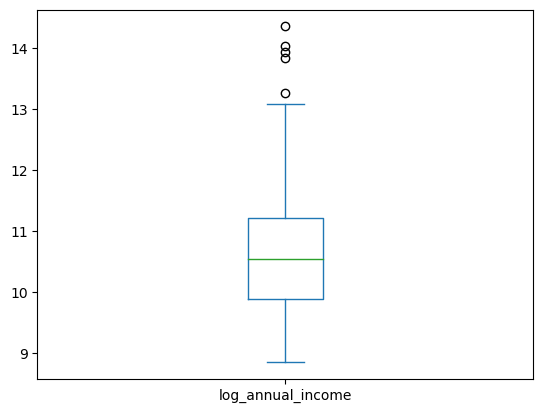

In [139]:
df["log_annual_income"].plot(kind='box')

#### Gráfico correlación

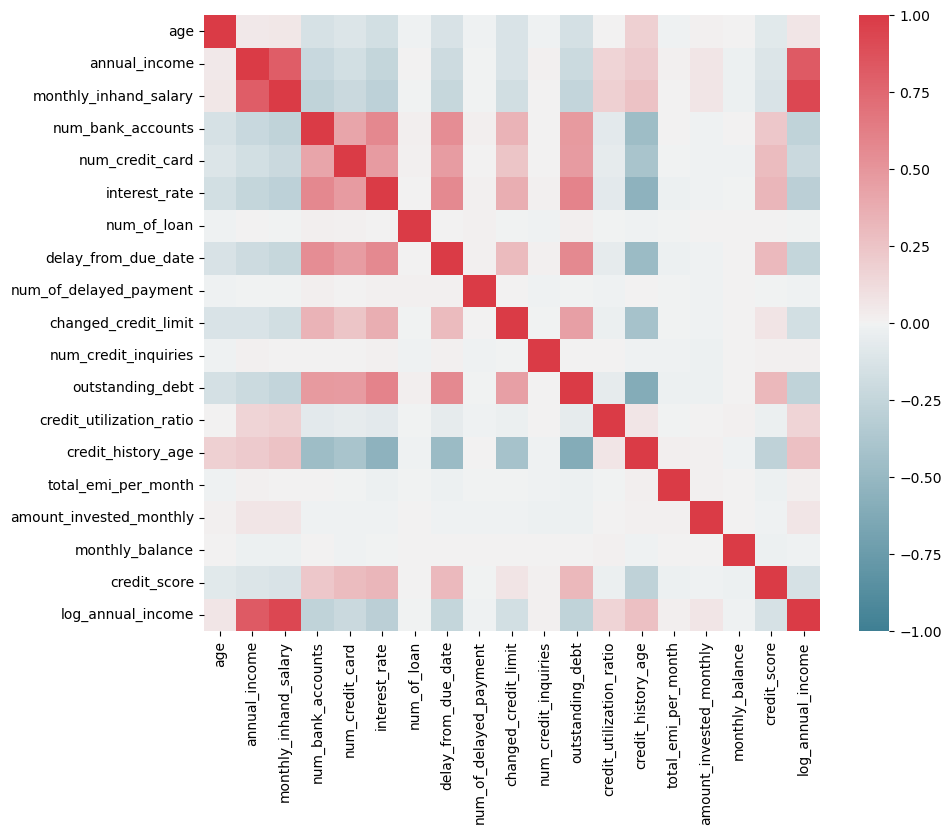

In [140]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, 
    vmax=1.0,
    square=True, 
    ax=ax)
plt.show()

Se puede observar bastante correlación entre el número de cuentas bancarias, tarjetas de crédito y la tasa de interés

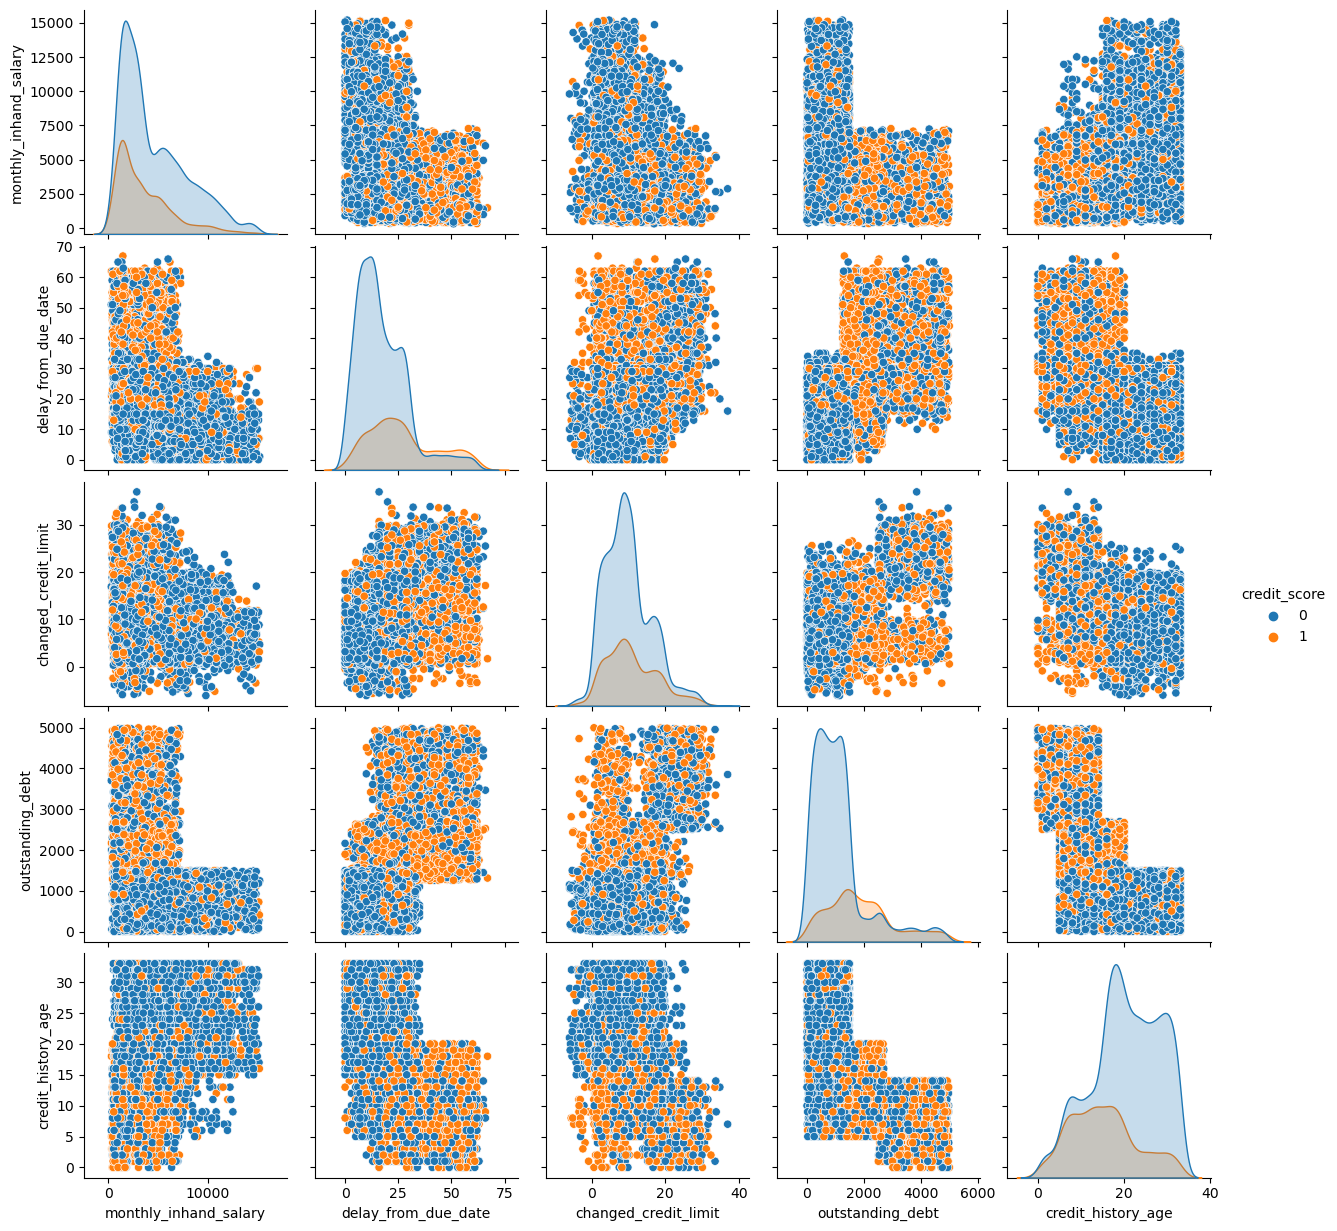

In [15]:
df_pp = df[
    [
        "monthly_inhand_salary", 
        "delay_from_due_date",
        "changed_credit_limit",
        "outstanding_debt",
        "credit_history_age",
        "credit_score"
        ]
    ]

sns.pairplot(df_pp, hue="credit_score")
plt.show()


## 3. Preparación de Datos

### 3.1. Preprocesamiento

Convertir las columnas mal leidas a sus tipos correspondientes (float, str, etc...)

In [141]:
df["age"] = df["age"].astype(int)
df["num_of_loan"] = df["num_of_loan"].astype(int)

Genere un `ColumnTransformer` que:
  - Preprocese datos categóricos y ordinales.
  - Escale/estandarice datos numéricos.
  - Uitlice `.set_output(transform="pandas")` sobre su `ColumnTransformer` para setear el formato de salida a de las transformaciones a pandas.

In [119]:
from sklearn.impute import KNNImputer

In [196]:
from sklearn.compose import make_column_selector

numeric_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

In [71]:
def tranform_nan_monthly_inhand_salary(dataframe):

    df_result = dataframe.copy()

    # imputacion sobre monthly_inhand_salary
    df_result['monthly_inhand_salary'] = df_result['monthly_inhand_salary'].fillna(df_result['annual_income']/12)

    return df_result

In [283]:
df["num_of_delayed_payment"].isna().sum()

670

In [295]:
set(cols_to_impute) & set(cols_minmax)# & set(cols_standard)

{'amount_invested_monthly',
 'credit_history_age',
 'monthly_balance',
 'num_credit_inquiries',
 'num_of_delayed_payment'}

In [457]:
# Columnas para transformar con OneHotEncoder


cols_to_impute_and_scale = [
    "monthly_inhand_salary",
    "credit_history_age",
    "num_of_delayed_payment",
    "amount_invested_monthly",
    "monthly_balance",
    "num_credit_inquiries",
    "changed_credit_limit",
]

cols_to_oh = [
    'occupation',
    'payment_of_min_amount',
    'payment_behaviour'
]

cols_minmax = [
    'age',
    'log_annual_income',
    'num_bank_accounts',
    'num_credit_card',
    'interest_rate',
    'num_of_loan',
    'outstanding_debt',
    'total_emi_per_month',
]

cols_standard = [
    'delay_from_due_date',
    'credit_utilization_ratio'
]

# Generamos el transformer de preprocesamiento
preprocessing_transformer = ColumnTransformer(
    transformers = [
        ("imputer_and_minmax", Pipeline([
            ("imputer",KNNImputer(n_neighbors=2, weights="uniform")),
            ('MinMax', MinMaxScaler())
        ]), cols_to_impute_and_scale),
        ('OneHotEncoder', OneHotEncoder(sparse_output=False), cols_to_oh),
        ('StandardScaler', StandardScaler(), cols_standard),
        ('MinMax', MinMaxScaler(), cols_minmax)
    ],
    remainder='passthrough'
).set_output(transform="pandas")

In [458]:
preprocessing_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_and_minmax',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=2)),
                                                 ('MinMax', MinMaxScaler())]),
                                 ['monthly_inhand_salary', 'credit_history_age',
                                  'num_of_delayed_payment',
                                  'amount_invested_monthly', 'monthly_balance',
                                  'num_credit_inquiries',
                                  'changed_credit_limit']),
                                ('OneHotEncoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['occupation', 'payment_of_min_amount',
                                  'payment_behaviour']),
                                ('StandardScaler', StandardScaler(),
                                 ['delay_from_due_date',
                                  'credit_utilization_ratio']),
                                ('MinMax', MinMaxScaler(),
                                 ['age', 'log_annual_income',
                                  'num_bank_accounts', 'num_credit_card',
                                  'interest_rate', 'num_of_loan',
                                  'outstanding_debt', 'total_emi_per_month'])])

In [459]:
df_preprocesado = preprocessing_transformer.fit_transform(df)
df_preprocesado

imputer_and_minmax__monthly_inhand_salary  \
0                                       0.102087   
1                                       0.183501   
2                                       0.797502   
3                                       0.154946   
4                                       0.171107   
...                                          ...   
12495                                   0.212380   
12496                                   0.604831   
12497                                   0.187462   
12498                                   0.109138   
12499                                   0.205072   

       imputer_and_minmax__credit_history_age  \
0                                    0.712121   
1                                    0.818182   
2                                    0.545455   
3                                    0.515152   
4                                    0.939394   
...                                       ...   
12495                                0.848485   
12496                                0.742424   
12497                                0.909091   
12498                                0.181818   
12499                                0.939394   

       imputer_and_minmax__num_of_delayed_payment  \
0                                        0.002095   
1                                        0.001629   
2                                        0.002095   
3                                        0.002793   
4                                        0.004190   
...                                           ...   
12495                                    0.003492   
12496                                    0.000698   
12497                                    0.002793   
12498                                    0.006518   
12499                                    0.002095   

       imputer_and_minmax__amount_invested_monthly  \
0                                         0.002479   
1                                         0.021890   
2                                         1.000000   
3                                         0.012562   
4                                         0.018133   
...                                            ...   
12495                                     0.011518   
12496                                     0.007081   
12497                                     0.004294   
12498                                     0.003466   
12499                                     0.016716   

       imputer_and_minmax__monthly_balance  \
0                                      1.0   
1                                      1.0   
2                                      1.0   
3                                      1.0   
4                                      1.0   
...                                    ...   
12495                                  0.5   
12496                                  0.5   
12497                                  0.5   
12498                                  0.5   
12499                                  0.5   

       imputer_and_minmax__num_credit_inquiries  \
0                                      0.001566   
1                                      0.000783   
2                                      0.001175   
3                                      0.001566   
4                                      0.001566   
...                                         ...   
12495                                  0.000392   
12496                                  0.003132   
12497                                  0.001175   
12498                                  0.003524   
12499                                  0.001175   

       imputer_and_minmax__changed_credit_limit  \
0                                      0.403712   
1                                      0.267981   
2                                      0.306961   
3                                      0.188399   
4                                      0.202088   
...                                

### 3.2. Holdout

Para efectos del modelo de clasificación, se elimina el id del cliente, ya que no aporta a la generalización del algoritmo.

In [ ]:
df.drop(columns=["customer_id"], inplace=True)

Se eliminan las filas que tienen valores nulos en ciertas columnas (más detalles en Parte 3.3).

In [461]:
y = df['credit_score']
X = df.drop(columns=['credit_score'])

In [462]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### 3.3. Datos nulos

In [463]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False).head(8).mul(100).round(2)

monthly_inhand_salary       15.17
credit_history_age           8.97
num_of_delayed_payment       6.68
amount_invested_monthly      4.37
monthly_balance              2.87
num_credit_inquiries         2.12
changed_credit_limit         2.02
credit_utilization_ratio     0.00
dtype: float64

De acuerdo a los resultados del análisis exploratorio (Sección 2.2), las columnas que presentan datos nulos con su respectivo porcentaje son:

| Atributo                | Porcentaje de datos nulos |
|-------------------------|---------------------------|
| monthly_inhand_salary   |   15.17                   |
| credit_history_age      |    8.97                   |
| num_of_delayed_payment  |    6.68                   |
| amount_invested_monthly |    4.37                   |
| monthly_balance         |    2.87                   |
| num_credit_inquiries    |    2.12                   |
| changed_credit_limit    |    2.02                   |

Además, se genera una visualización Missigno sobre el dataframe.

<AxesSubplot:>

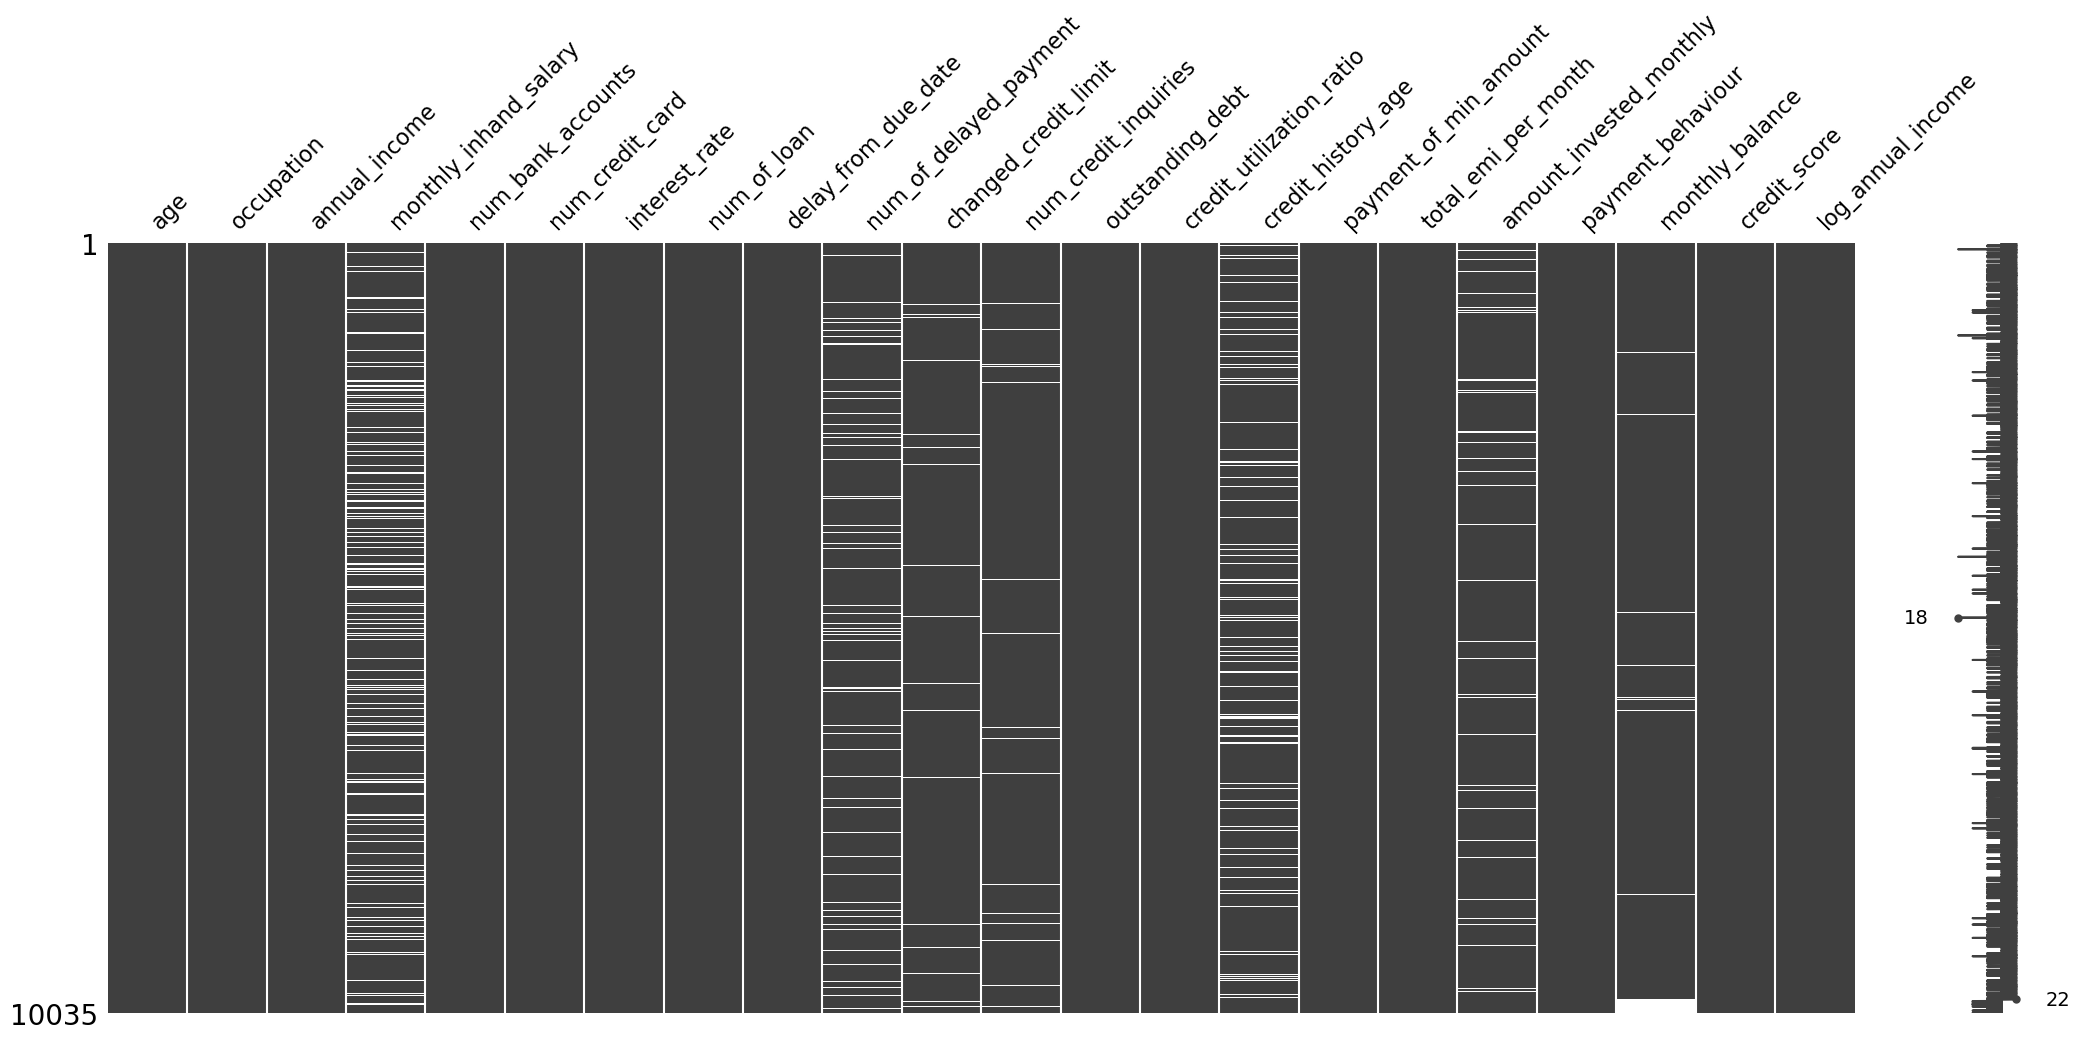

In [319]:
%matplotlib inline

msno.matrix(df)

No se observa ningún patrón de datos nulos.

Para tratar los valores faltantes usaremos el KNNImputer con `weights=uniform` para las variables con datos nulos, lo cual ya fue incluido en el Pipeline de preprocesamiento.

## 4. Baseline
Se generan varios Pipeline que utilizan diferentes tipos de modelos de clasificación.

In [464]:
def create_pipeline(clf):
    return Pipeline([
        ('preprocesamiento', preprocessing_transformer),
        ('clf', clf)
    ])

In [482]:
rs = 666

pipe_dummy = create_pipeline(DummyClassifier(strategy='stratified', random_state=rs))
pipe_logit = create_pipeline(LogisticRegression(random_state=rs))
pipe_knn = create_pipeline(KNeighborsClassifier())
pipe_dtc = create_pipeline(DecisionTreeClassifier(random_state=rs))
pipe_svc = create_pipeline(SVC(random_state=rs))
pipe_rfc = create_pipeline(RandomForestClassifier(random_state=rs))
pipe_lgbm = create_pipeline(ltb.LGBMClassifier(random_state=rs))
pipe_xgb = create_pipeline(xgb.XGBClassifier(random_state=rs))

In [483]:
classifiers = {
    'Dummy': pipe_dummy,
    'Logistic Regression': pipe_logit,
    'KNN': pipe_knn,  
    'Decision Tree': pipe_dtc,
    'SVM': pipe_svc,
    'Random Forest': pipe_rfc,
    'LGBM': pipe_lgbm,
    'XGBoost': pipe_xgb
}

metric_dict = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{name}:\n')
    print(classification_report(y_test, y_pred))
    metric_dict[name] = recall_score(y_test, y_pred, average=None)[1]

Dummy:

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1476
           1       0.28      0.28      0.28       531

    accuracy                           0.62      2007
   macro avg       0.51      0.51      0.51      2007
weighted avg       0.62      0.62      0.62      2007

Logistic Regression:

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1476
           1       0.00      0.00      0.00       531

    accuracy                           0.74      2007
   macro avg       0.37      0.50      0.42      2007
weighted avg       0.54      0.74      0.62      2007



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


KNN:

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1476
           1       0.40      0.21      0.28       531

    accuracy                           0.71      2007
   macro avg       0.58      0.55      0.55      2007
weighted avg       0.66      0.71      0.67      2007

Decision Tree:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1476
           1       0.44      0.45      0.45       531

    accuracy                           0.71      2007
   macro avg       0.62      0.62      0.62      2007
weighted avg       0.71      0.71      0.71      2007

SVM:

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1476
           1       0.00      0.00      0.00       531

    accuracy                           0.74      2007
   macro avg       0.37      0.50      0.42      2007
weighted avg       0.54      0.74      0.62   

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Random Forest:

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1476
           1       0.68      0.45      0.54       531

    accuracy                           0.80      2007
   macro avg       0.75      0.69      0.71      2007
weighted avg       0.78      0.80      0.78      2007

[LightGBM] [Info] Number of positive: 2124, number of negative: 5904
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2483
[LightGBM] [Info] Number of data points in the train set: 8028, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264574 -> initscore=-1.022329
[LightGBM] [Info] Start training from score -1.022329
LGBM:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1476
           1       0.66      0.48      0.56    

In [484]:
metric_df = pd.DataFrame(metric_dict.items(), columns=['Modelo', 'Recall'])
metric_df.sort_values(by=["Recall"], ascending=False)

Modelo    Recall
6                 LGBM  0.483992
3        Decision Tree  0.450094
5        Random Forest  0.450094
7              XGBoost  0.442561
0                Dummy  0.278719
2                  KNN  0.210923
1  Logistic Regression  0.000000
4                  SVM  0.000000

Se puede observar que so Logit, SVC y KNN no le logran ganar al clasificador Dummy respecto al Recall, lo cual no deja de ser interesnate.

Se puede observar que el mejor modelo que da respecto a la métrica evaluada es el LightGBM.

Se cree que es mejor porque combina varios modelos débiles de manera secuencia e intuitivamente va aprendiendo de los errores del predecesor, es bastante más robusto que un Decision Tree que sólo realiza cortes en las variables.

Se probará para experimentar con los dos mejores modelos, LightGBM y DecisionTree

### 5. Optimización del Modelo

Se trabajará con LightGBM y Decision Tree por ser los mejores modelos.

In [ ]:
# !pip install optuna
import optuna

In [490]:
from sklearn.feature_selection import SelectPercentile, f_classif


pipe_lgbm = Pipeline([
        ('preprocesamiento', preprocessing_transformer),
        ("feature_selection", SelectPercentile(score_func=f_classif, percentile=90)), # agregamos la opción de seleccionar un subconjunto de features
        ('clf', ltb.LGBMClassifier(random_state=rs))
    ])

pipe_dtc = Pipeline([
        ('preprocesamiento', preprocessing_transformer),
        ("feature_selection", SelectPercentile(score_func=f_classif, percentile=90)), # agregamos la opción de seleccionar un subconjunto de features
        ('clf', DecisionTreeClassifier(random_state=rs))
    ])

In [496]:
params_lgbm = {
        'clf__n_estimators': [50, 100, 200],      # Número de árboles a construir
        'clf__min_child_samples': [10,20],
        'clf__max_depth': [5, 10, -1],         # Profundidad máxima del árbol (-1 significa sin límite)
        'clf__subsample': [0.8, 1.0],        # Proporción de muestras utilizadas en cada árbol
        'clf__colsample_bytree': [0.8, 1.0], # Proporción de columnas utilizadas en cada árbol
        'feature_selection__percentile': [60, 80, 100],
    }

params_dtc = {
        'clf__criterion': ['gini', 'entropy'],  # Función para medir la calidad de la división
        'clf__splitter': ['best', 'random'],    # Estrategia para elegir la división en cada nodo
        'clf__max_depth': [None, 10, 20, 30],   # Profundidad máxima del árbol. None significa sin límite.
        'clf__min_samples_split': [2, 5, 10],   # Número mínimo de muestras requeridas para dividir un nodo
        'clf__min_samples_leaf': [1, 2, 4],     # Número mínimo de muestras requeridas en una hoja
        'feature_selection__percentile': [60, 80, 100],
        'class_weight': ['balanced', None]
}

In [492]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

hgs_lgbm = HalvingGridSearchCV(pipe_lgbm, params_lgbm, n_jobs=-1, scoring='recall', verbose=10, cv=3)
hgs_dtc = HalvingGridSearchCV(pipe_dtc, params_dtc, n_jobs=-1, scoring='recall', verbose=10, cv=3)

In [493]:
hgs_lgbm.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 99
max_resources_: 8028
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 216
n_resources: 99
Fitting 3 folds for each of 216 candidates, totalling 648 fits
----------
iter: 1
n_candidates: 72
n_resources: 297
Fitting 3 folds for each of 72 candidates, totalling 216 fits
----------
iter: 2
n_candidates: 24
n_resources: 891
Fitting 3 folds for each of 24 candidates, totalling 72 fits
----------
iter: 3
n_candidates: 8
n_resources: 2673
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 4
n_candidates: 3
n_resources: 8019
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[LightGBM] [Info] Number of positive: 2124, number of negative: 5904
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2483
[LightGBM] [Info

HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('preprocesamiento',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('imputer_and_minmax',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 KNNImputer(n_neighbors=2)),
                                                                                                ('MinMax',
                                                                                                 MinMaxScaler())]),
                                                                                ['monthly_inhand_salary',
                                                                                 'credit_history_age',
                                                                                 'num_of_delayed_payment',
                                                                                 'amount_invested_monthly',
                                                                                 'monthly_balance',
                                                                                 'num...
                                                                                 'total_emi_per_month'])])),
                                              ('feature_selection',
                                               SelectPercentile(percentile=90)),
                                              ('clf',
                                               LGBMClassifier(random_state=666))]),
                    n_jobs=-1,
                    param_grid={'clf__colsample_bytree': [0.8, 1.0],
                                'clf__max_depth': [5, 10, -1],
                                'clf__min_child_samples': [10, 20],
                                'clf__n_estimators': [50, 100, 200],
                                'clf__subsample': [0.8, 1.0],
                                'feature_selection__percentile': [60, 80, 100]},
                    scoring='recall', verbose=10)

In [497]:
hgs_dtc.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 99
max_resources_: 8028
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 144
n_resources: 99
Fitting 3 folds for each of 144 candidates, totalling 432 fits


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


----------
iter: 1
n_candidates: 48
n_resources: 297
Fitting 3 folds for each of 48 candidates, totalling 144 fits


One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan    

----------
iter: 2
n_candidates: 16
n_resources: 891
Fitting 3 folds for each of 16 candidates, totalling 48 fits


One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan    

----------
iter: 3
n_candidates: 6
n_resources: 2673
Fitting 3 folds for each of 6 candidates, totalling 18 fits


One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan    

----------
iter: 4
n_candidates: 2
n_resources: 8019
Fitting 3 folds for each of 2 candidates, totalling 6 fits


One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan    

HalvingGridSearchCV(cv=3,
                    estimator=Pipeline(steps=[('preprocesamiento',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('imputer_and_minmax',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 KNNImputer(n_neighbors=2)),
                                                                                                ('MinMax',
                                                                                                 MinMaxScaler())]),
                                                                                ['monthly_inhand_salary',
                                                                                 'credit_history_age',
                                                                                 'num_of_delayed_payment',
                                                                                 'amount_invested_monthly',
                                                                                 'monthly_balance',
                                                                                 'num...
                                                                                 'total_emi_per_month'])])),
                                              ('feature_selection',
                                               SelectPercentile(percentile=90)),
                                              ('clf',
                                               DecisionTreeClassifier(random_state=666))]),
                    n_jobs=-1,
                    param_grid={'clf__criterion': ['gini', 'entropy'],
                                'clf__max_depth': [None, 10, 20, 30],
                                'clf__min_samples_leaf': [1, 2, 4],
                                'clf__min_samples_split': [2, 5, 10],
                                'clf__splitter': ['best', 'random']},
                    scoring='recall', verbose=10)

In [495]:
print('LightGBM:')
print(f'Best Recall: {hgs_lgbm.best_score_}')
print(f'Best params: {hgs_lgbm.best_params_}')

LightGBM:
Best Recall: 0.48206921570824196
Best params: {'clf__colsample_bytree': 1.0, 'clf__max_depth': -1, 'clf__min_child_samples': 10, 'clf__n_estimators': 50, 'clf__subsample': 0.8, 'feature_selection__percentile': 100}


In [499]:
print('Decision Tree Classifier:')
print(f'Best Recall: {hgs_xgb.best_score_}')
print(f'Best params: {hgs_xgb.best_params_}')

Decision Tree Classifier:
Best Recall: 0.46110654508371773
Best params: {'clf__colsample_bytree': 0.8, 'clf__max_depth': 10, 'clf__min_child_samples': 10, 'clf__n_estimators': 200, 'clf__subsample': 1.0, 'feature_selection__percentile': 80}


Se puede notar que el mejor modelo da LightGBM, evaluemoslo en el conjunto de test

In [500]:
y_pred = hgs_lgbm.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1476
           1       0.66      0.48      0.55       531

    accuracy                           0.80      2007
   macro avg       0.74      0.69      0.71      2007
weighted avg       0.78      0.80      0.78      2007



Podemos notar que el modelo consigue un Recall de 0.5 sobre la clase 1 y un f1-score macro de 0.72, lo cual permite decir que logra identificar a la mitad de clientes que caerán en default.

In [ ]:
# def objective(trial):
#     param = {
#         'objective': 'binary',
#         'metric': 'binary_logloss',
#         'boosting_type': 'gbdt',
#         'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
#         'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
#         'num_leaves': trial.suggest_int('num_leaves', 2, 256),
#         'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
#         'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
#         'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#     }

#     # Entrenar el modelo con los hiperparámetros sugeridos por Optuna
#     model = lgb.LGBMClassifier(**param)
#     model.fit(X_train, y_train)

#     # Calcular la puntuación AUC-ROC en el conjunto de prueba
#     y_pred = model.predict_proba(X_test)[:, 1]
#     score = roc_auc_score(y_test, y_pred)

#     return score

In [ ]:
# optuna_search = optuna.integration.OptunaSearchCV(clf, param_distributions)

# optuna_search.fit(X, y)
# y_pred = optuna_search.predict(X)

## 6. Interpretabilidad

Ya tenemos un modelo seleccionado en base a la métrica de Recall, la que nos permiten minimizar la tasa de falsos negativos e idenficiar la máxima cantidad de clientes que caeran en default.


Para interpretar el modelo usaremos SHAP, una técnica que proporciona valores de atribución para cada característica, lo que permite explicar la contribución individual de cada variable en la predicción del riesgo de default. Esto ayuda a entender cómo el modelo  toma las decisiones y si el modelo está basando sus estimaciones en decisiones sesgadas o injustas.

In [ ]:
# !pip install shap

In [522]:
hgs_lgbm.best_params_

{'clf__colsample_bytree': 1.0,
 'clf__max_depth': -1,
 'clf__min_child_samples': 10,
 'clf__n_estimators': 50,
 'clf__subsample': 0.8,
 'feature_selection__percentile': 100}

In [640]:
best_pipe = Pipeline([
        ('preprocesamiento', preprocessing_transformer),
        ('clf', 
            ltb.LGBMClassifier(
                random_state=rs,
                colsample_bytree= 1.0,
                max_depth= -1,
                min_child_samples=10,
                n_estimators= 50,
                subsample= 0.8))
    ])  

In [641]:
best_pipe.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2124, number of negative: 5904
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2483
[LightGBM] [Info] Number of data points in the train set: 8028, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264574 -> initscore=-1.022329
[LightGBM] [Info] Start training from score -1.022329


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer_and_minmax',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=2)),
                                                                  ('MinMax',
                                                                   MinMaxScaler())]),
                                                  ['monthly_inhand_salary',
                                                   'credit_history_age',
                                                   'num_of_delayed_payment',
                                                   'amount_invested_monthly',
                                                   'monthly_balance',
                                                   'num_credit_inquiries',
                                                   'changed_credit_...
                                                   'payment_behaviour']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['delay_from_due_date',
                                                   'credit_utilization_ratio']),
                                                 ('MinMax', MinMaxScaler(),
                                                  ['age', 'log_annual_income',
                                                   'num_bank_accounts',
                                                   'num_credit_card',
                                                   'interest_rate',
                                                   'num_of_loan',
                                                   'outstanding_debt',
                                                   'total_emi_per_month'])])),
                ('clf',
                 LGBMClassifier(min_child_samples=10, n_estimators=50,
                                random_state=666, subsample=0.8))])

## 6. Interpretabilidad

In [749]:
import shap

model = best_pipe[-1]
features = best_pipe[:-1].transform(X_test)

explainer = shap.TreeExplainer(model)
shap_values = explainer(features)[:,:,0]

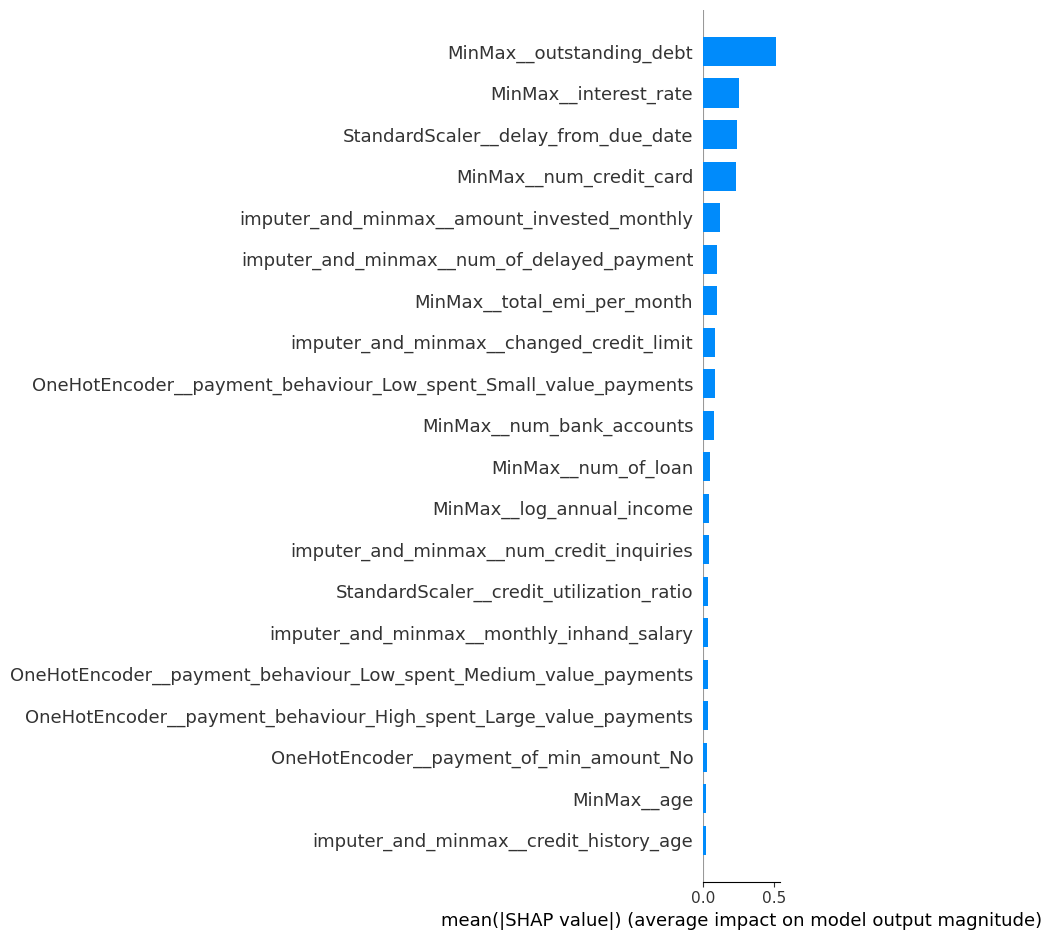

In [750]:
shap.summary_plot(
    shap_values, 
    features, 
    plot_type="bar")

## 6. Interpretabilidad

Si revisamos el aporte a nivel global de cada variable, podemos notar que la que aporta más es `outstanding_debt` que representa la deuda pendiente de pago y en segundo lugar el `interest_rate` que representa el tipo de interés en la tarjeta de credito

In [651]:
shap.initjs()

In [755]:
def plot_shap(idx):
    display(shap.force_plot(
        explainer.expected_value[0], 
        shap_values.values[idx,:], 
        features.iloc[idx,:],
        link="logit"
    )
    )
    shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

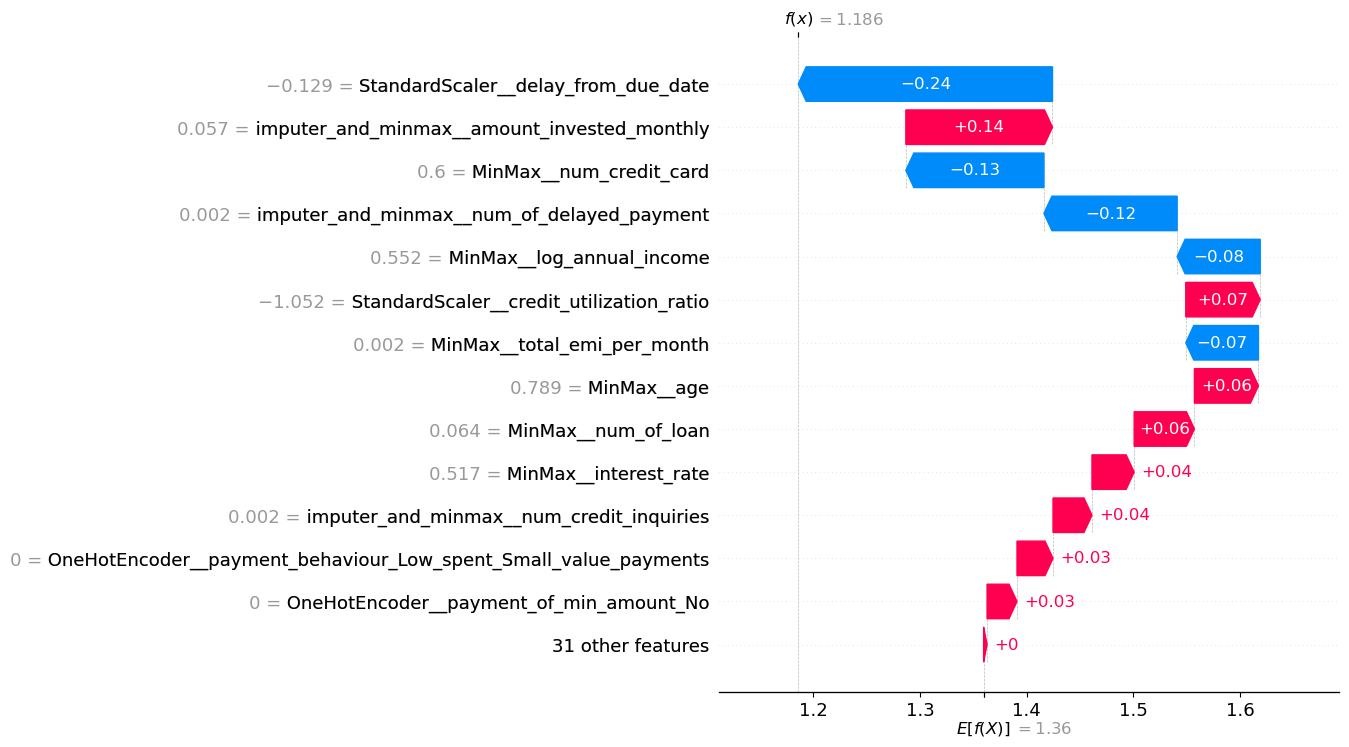

In [756]:
plot_shap(1)

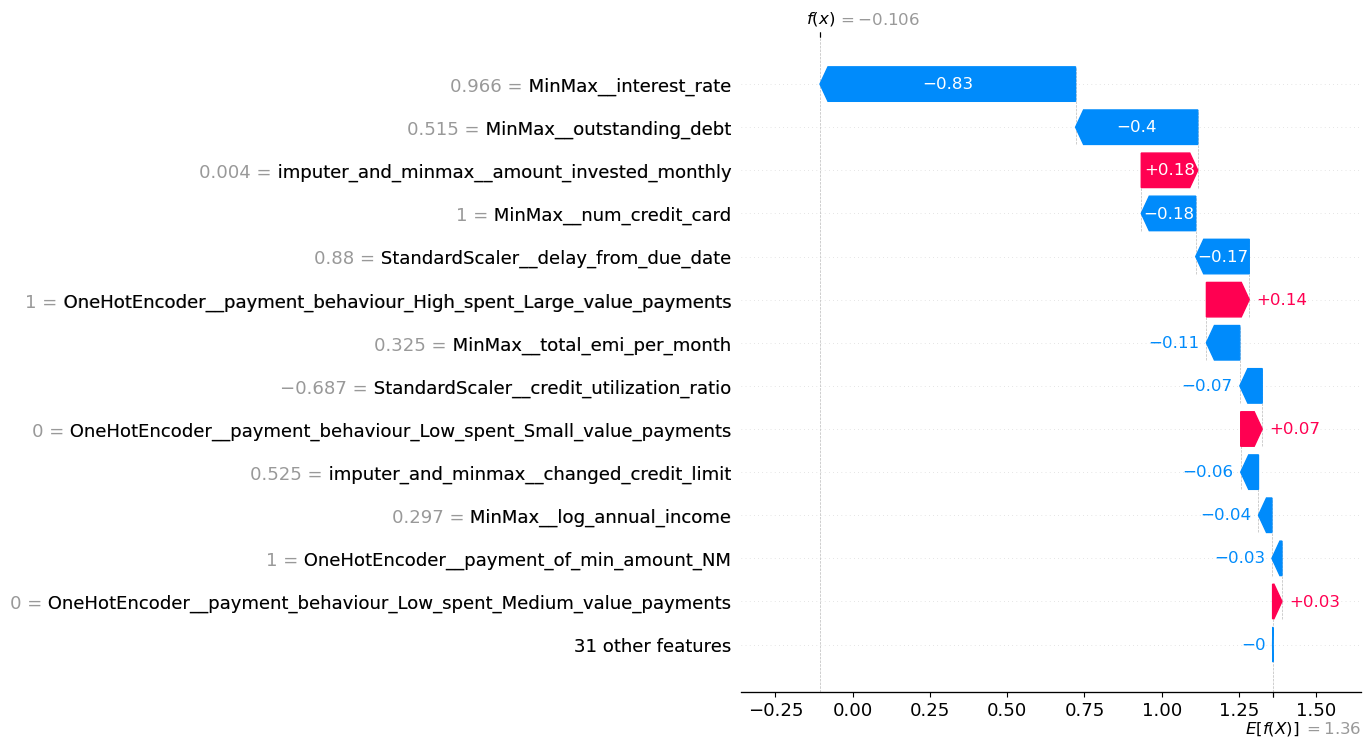

In [757]:
plot_shap(23)

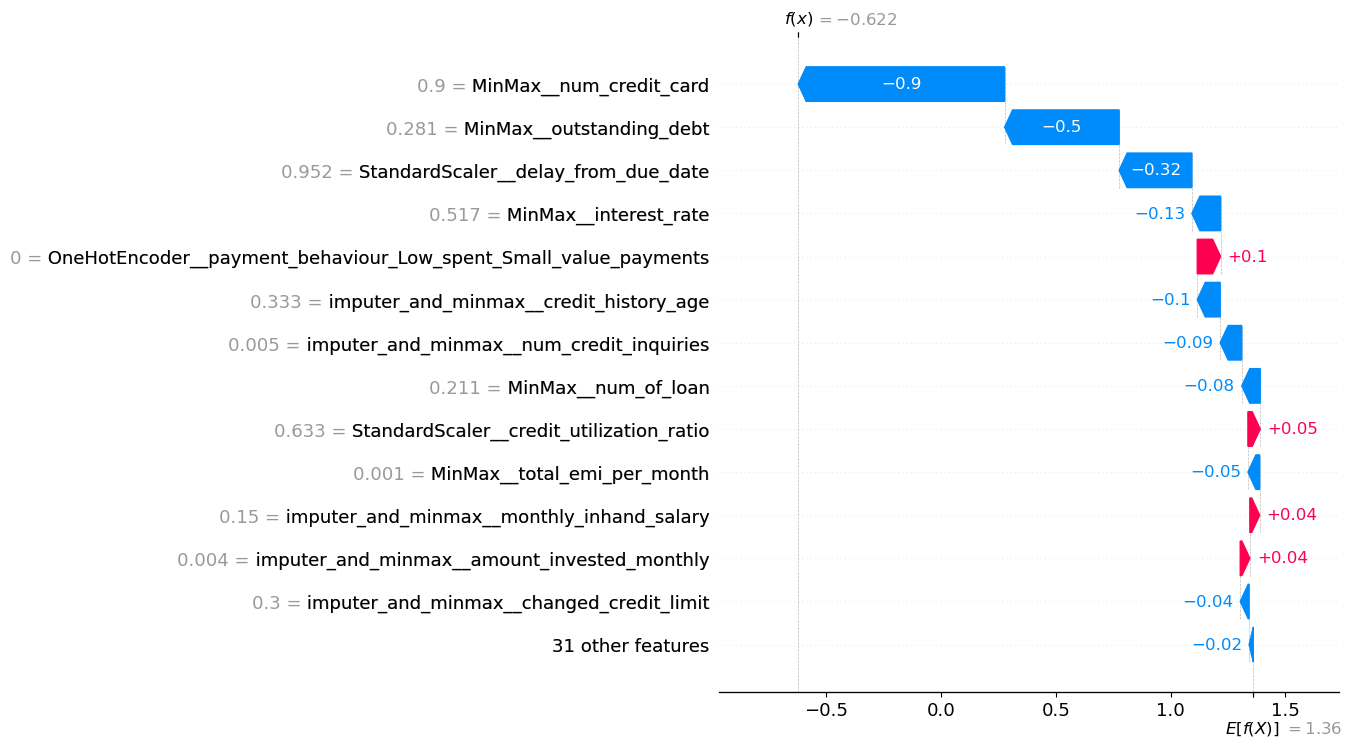

In [758]:
plot_shap(534)

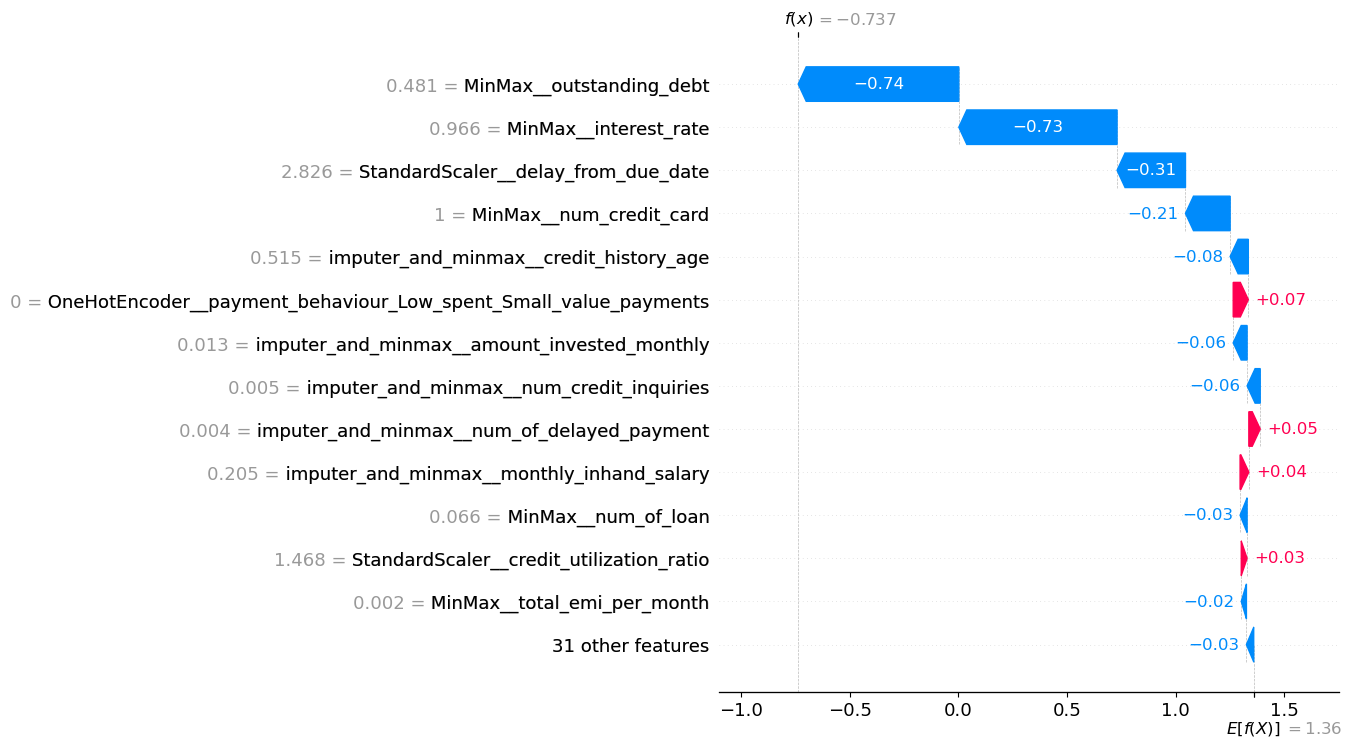

In [759]:
plot_shap(123)

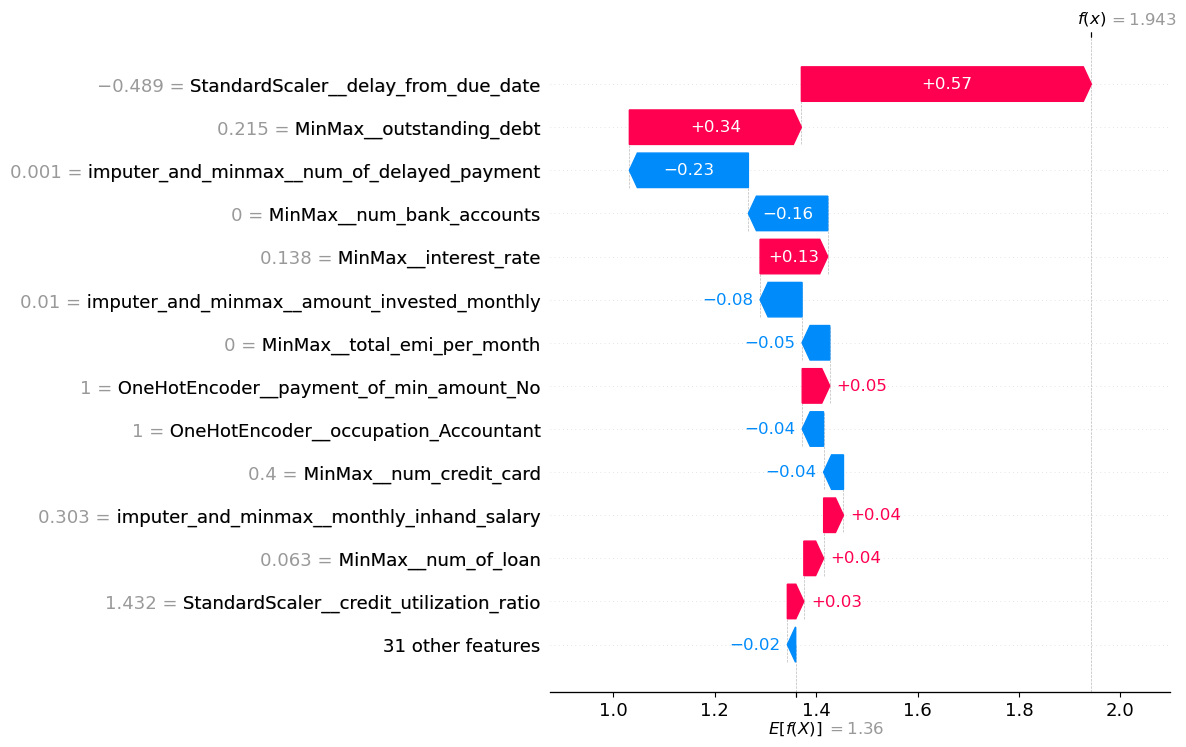

In [760]:
plot_shap(666)

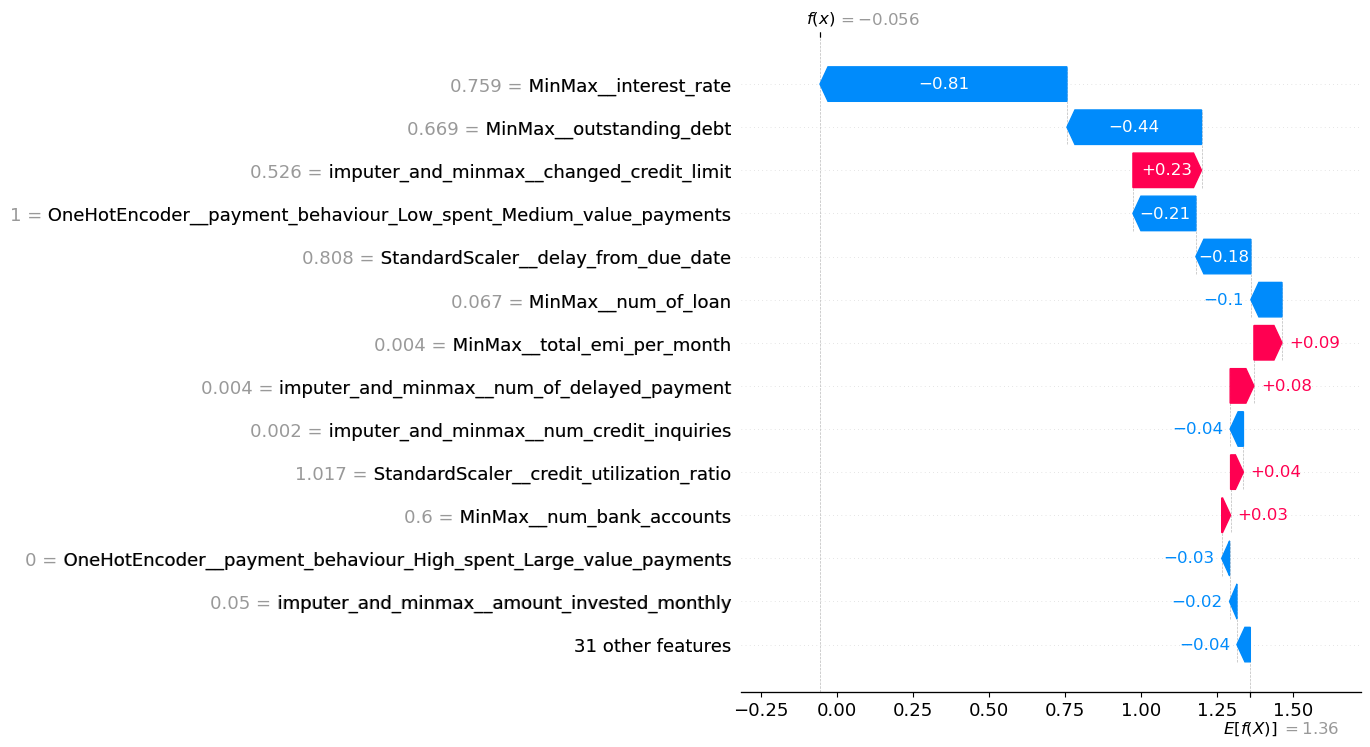

In [761]:
plot_shap(623)

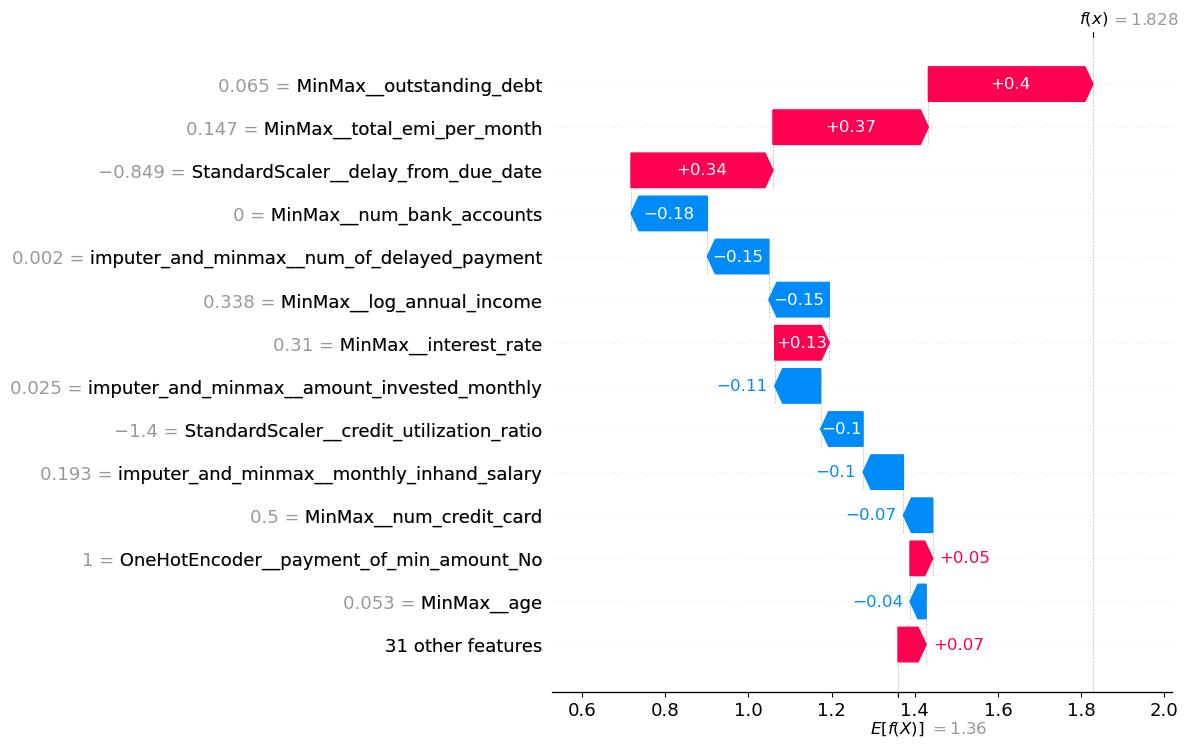

In [762]:
plot_shap(1232)

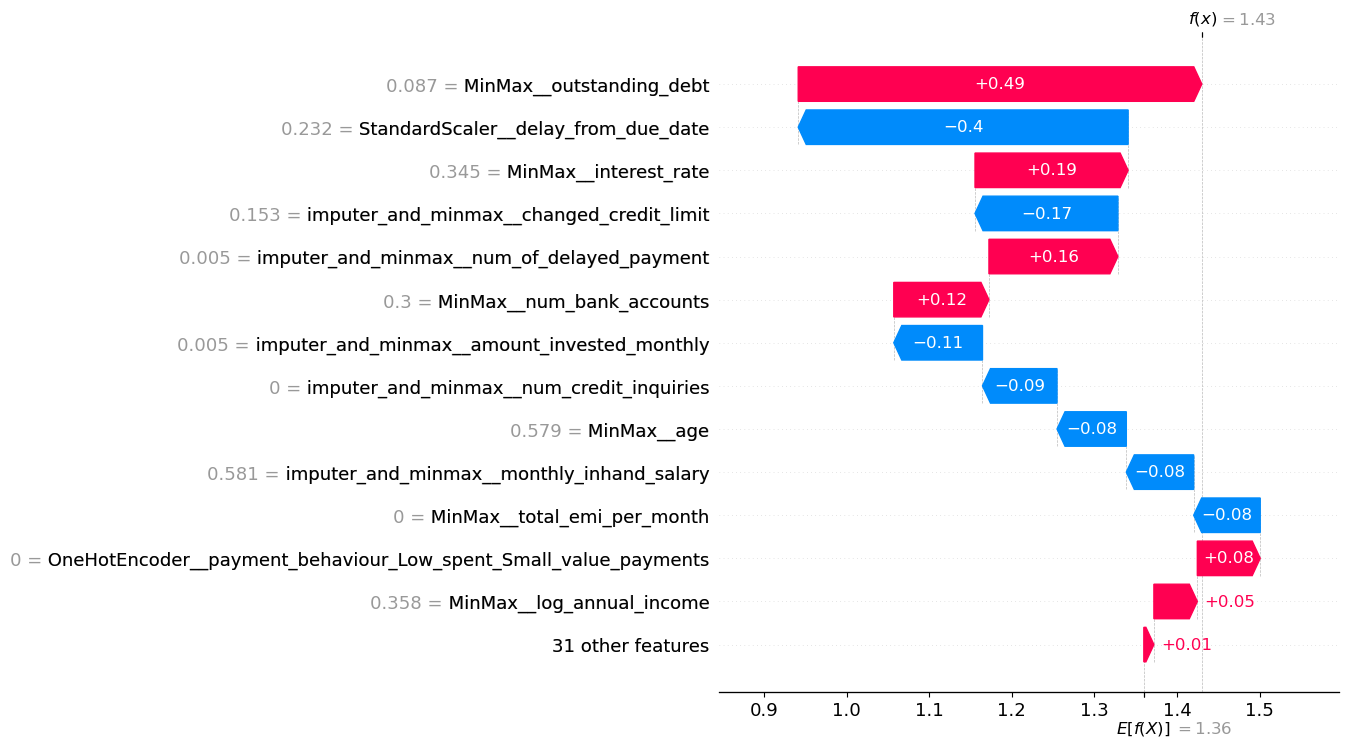

In [763]:
plot_shap(445)

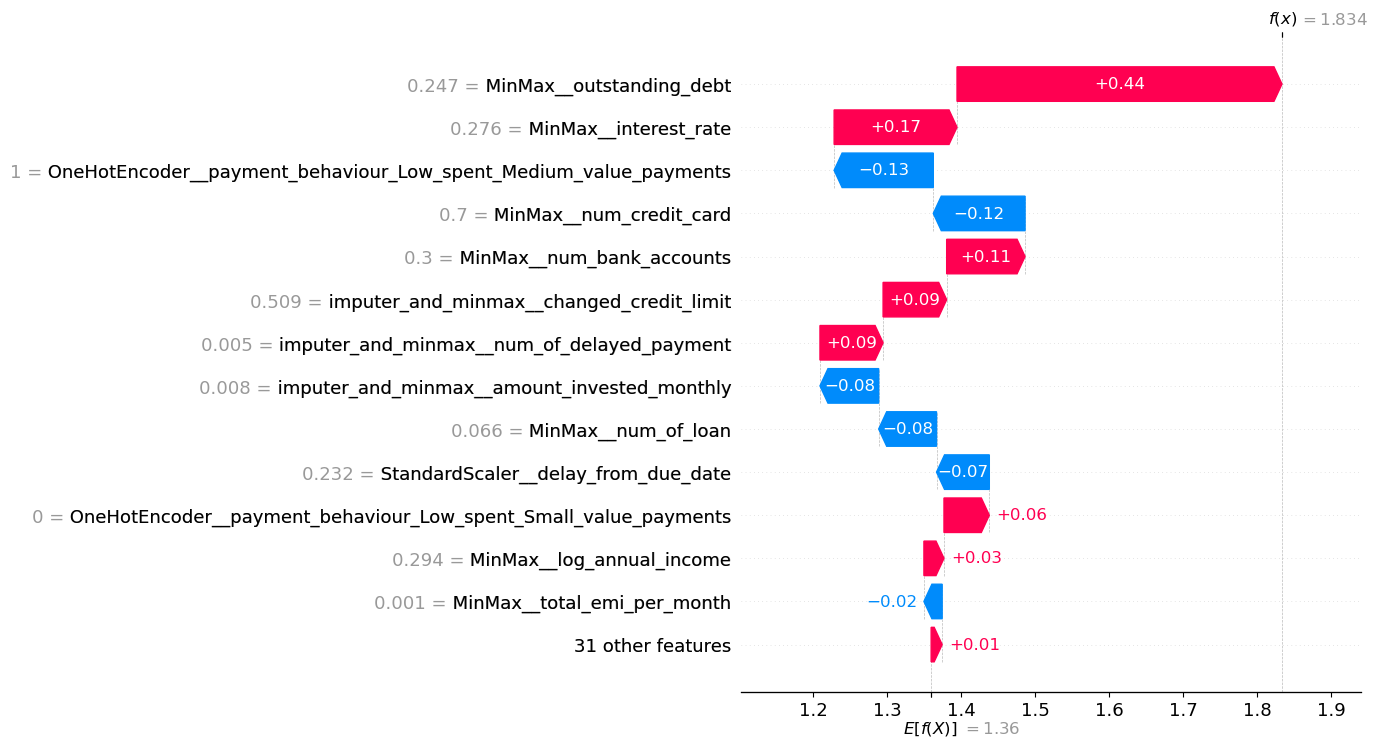

In [764]:
plot_shap(99)

#### Evaluar interacciones variables más relevante entre clases

Escogeremos las 5 variables más importantes y evaluaremos su comporamiento

In [766]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)
feature_importance_names = features.columns[shap_values_abs.argsort()[::-1]]

In [769]:
feature_importance_names[:5]

Index(['MinMax__outstanding_debt', 'MinMax__interest_rate',
       'StandardScaler__delay_from_due_date', 'MinMax__num_credit_card',
       'imputer_and_minmax__amount_invested_monthly'],
      dtype='object')

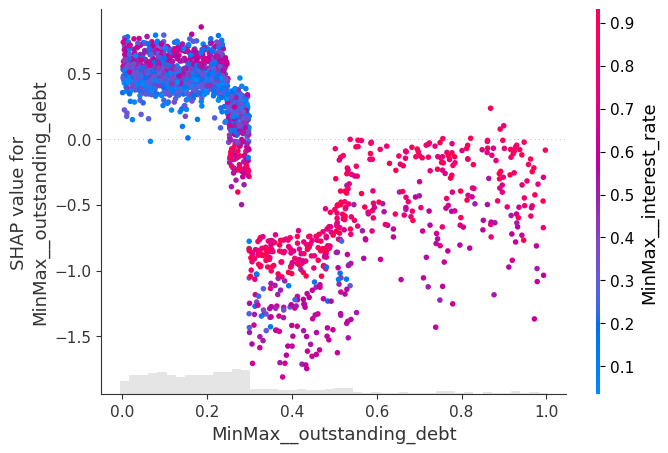

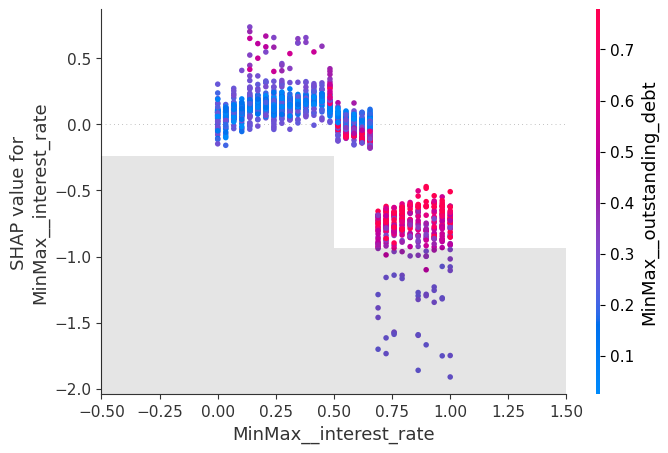

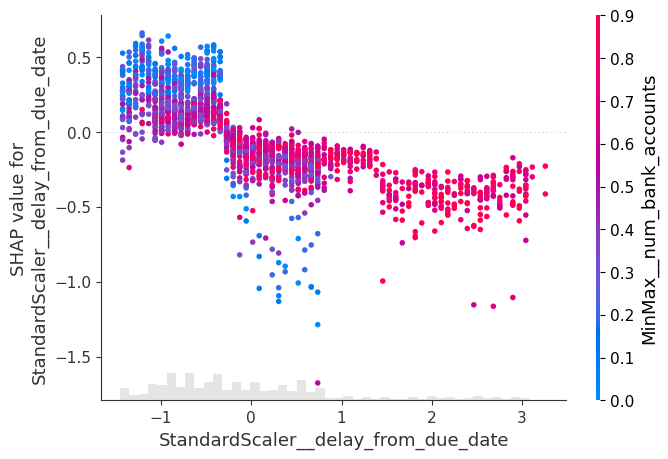

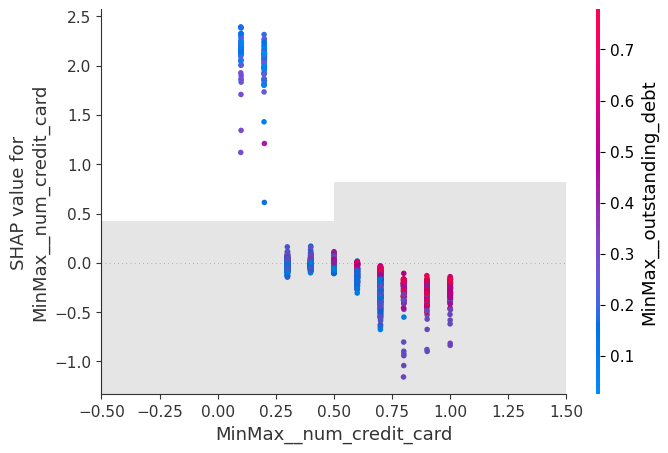

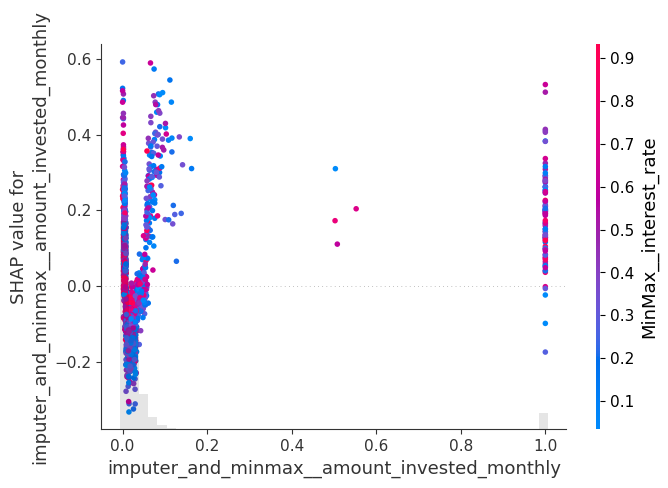

In [768]:
for name in feature_importance_names[:5]:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name], 
                   color=shap_values)

La interpretación se separará por cada variable graficada:

* `outstanding_debt`: Se puede notar que a mayor deuda la probabilidad de ser cliente riesgoso es más alta, lo cual hace sentido.

* `interest_rate`: Se observa que a mayor tasa de interés la probabilidad de ser cliente riesgoso aumenta, por lo cual pareciera ser una manera de disminir el riesgo considerar tasas mas altas para este tipo de clientes.

* `delay_from_due_date`: A mayor número de días de retraso en pagar también tiende a ser mayor la probabilida de un cliente riesgoso

* `num_credit_card`: Los clientes con más tarjetas de crédito también tienden a ser más riesgosos.

* `amount_invested_monthly`: Representa lo aportado mensualmente por el cliente, se puede observar que los clientes que más invierten son menos propensos a ser riesgosos.

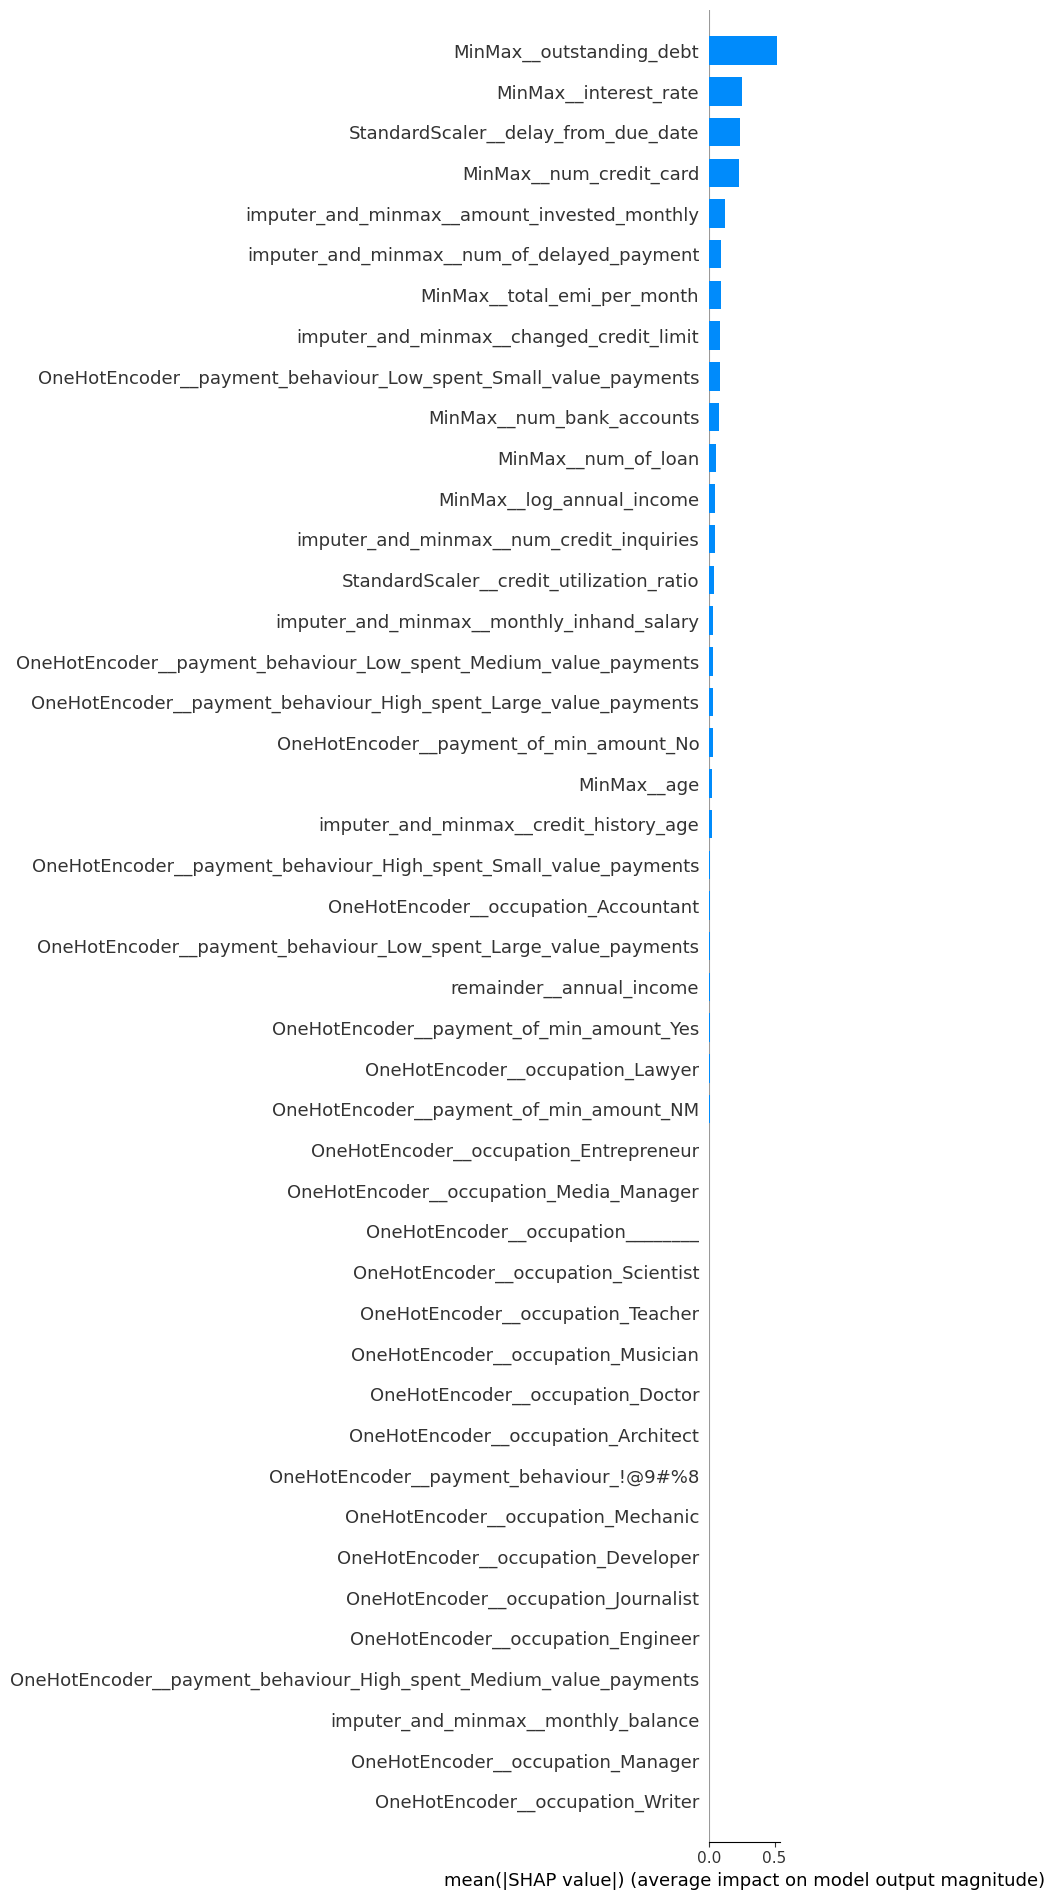

In [787]:
shap.summary_plot(
    shap_values, 
    features, 
    max_display=44,
    plot_type="bar")

En terminos generales se puede observar que las variables menos importantes hacen alusión a la ocupación del cliente, lo cual puede ser edbido a la gran cantidad de categorías de estos. Por lo que como oportunidad de mejora se podría explorar disminuyendo la cantidad de categorias en un número menor de segmentos.

## 7. Conclusiones

En base al trabajo realizado se puede concluir que el modelo de LightGBM entregó los mejores resultados en base a la métrica Recall definida como objetivo al inicio del proyecto, con un recall alrededor de 0.5, lo que permite identificar con certeza a la mitad de los clientes riesgosos y es ampliamente superior a elegirlos aleatoriamente.

El trabajo de preprocesar los datos consistió en la eliminación de valores atipicos, normalización de columnas y creación variables dummy para las variables categóricas. 

Se cree que los resultados se podrían mejorar incluyendo variables con más conocimiento experto, interacciones u otras. Además, se dejó por simplicidad la gran cantidad de categorías de ocupación de clientes lo que según lo visto no aportó información al modelo global porque son las menos importantes.

El trabajo de exploración fue fundamental para darse cuenta que había variables con gran cantidad de outliers, por lo que fue relevante preprocesarlas y dejarlas acotadas en rangos razonables. Este trabajo permite evitar sesgos del modelo por aquellos clientes particulares.

En base a la optimización del modelo no se logró mejorar la métrica estudiada, lo que puede tener relación con haber alcanzado la capacidad del modelo, como se ha visto a lo largo del curso, el trabajo en crear features es lo que más impacta los resultados.

Respecto a la interpretabilidad el modelo parece no discriminar a clientes en función de características propias sino que fundamenta su predicción en base al comportamiento y al riesgo que le genera al banco dado su gran cantidad de tarjetas de créditos, atraso en sus cuentas. En simple, variables asociadas a su comportamiento crediticio.

El mayor aprendizaje del proyecto se relacion a la estructura de pipelines y en entender y dedicar bastante tiempo a entender los datos y sus distribuciones. Asimismo el uso de SHAP permite comprender de manera muy acertada cómo predice el modelo lo que puede ayudar a entender el por qué no se consiguen mejores resultados y motivar a trabajar en la creación de nuevas features.